In [1]:
# Import built-in modules
import sys
import platform
import os
from pathlib import Path
import warnings

# Import external modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython.display as ipyd

In [2]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import zscore

In [3]:
# importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score, precision_score

In [4]:
df = pd.read_csv('new_with_more_featuresformodelling.csv')
df.tail()

,HAS_CLAIMED_IN_NEXT_12_MONTHS,PREMIUM_CHARGED,NO_CLAIM_DISCOUNT,SPECIAL_DISCOUNT,SUM_INSURED,LOADINGS,FLAG_POLICY_TYPE_OF_COVER_CHANGE_IN_LAST_12_MONTHS,POLICY_HISTORY_AGE,POLICY_TERM,COMPANY_LOADINGS,type_of_cover,transaction_type,client_gender,open_restricted_flag,pa_driver_included,vehicle_condition,flag_vehicle_condition,flag_vehicle_type_on_seating_capacity
59206,0,13979.45519,0.23,0.32,116126.10,0.13,0,1,12,0.35,0,5,0,0,0,2,1,1
59207,0,13190.29240,0.23,0.32,104513.49,0.13,0,2,12,0.38,0,5,0,0,0,2,1,1
59208,0,10474.98392,0.24,0.39,126178.00,0.09,0,0,12,0.30,0,2,0,0,1,2,0,0
59209,0,10716.71432,0.24,0.39,119869.10,0.09,0,1,12,0.35,0,5,0,0,1,2,0,0
59210,0,10111.73851,0.24,0.39,107882.19,0.09,0,2,12,0.38,0,5,0,0,1,2,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59211 entries, 0 to 59210
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   HAS_CLAIMED_IN_NEXT_12_MONTHS                       59211 non-null  int64  
 1   PREMIUM_CHARGED                                     59211 non-null  float64
 2   NO_CLAIM_DISCOUNT                                   59211 non-null  float64
 3   SPECIAL_DISCOUNT                                    59211 non-null  float64
 4   SUM_INSURED                                         59211 non-null  float64
 5   LOADINGS                                            59211 non-null  float64
 6   FLAG_POLICY_TYPE_OF_COVER_CHANGE_IN_LAST_12_MONTHS  59211 non-null  int64  
 7   POLICY_HISTORY_AGE                                  59211 non-null  int64  
 8   POLICY_TERM                                         59211 non-null  int64  


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop(['HAS_CLAIMED_IN_NEXT_12_MONTHS'],axis=1)
y = df['HAS_CLAIMED_IN_NEXT_12_MONTHS']

In [7]:
# Train-Test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=27)

In [15]:
X_test.to_csv("Independent.csv")

In [25]:
X_test.head()

,PREMIUM_CHARGED,NO_CLAIM_DISCOUNT,SPECIAL_DISCOUNT,SUM_INSURED,LOADINGS,FLAG_POLICY_TYPE_OF_COVER_CHANGE_IN_LAST_12_MONTHS,POLICY_HISTORY_AGE,POLICY_TERM,COMPANY_LOADINGS,type_of_cover,transaction_type,client_gender,open_restricted_flag,pa_driver_included,vehicle_condition,flag_vehicle_condition,flag_vehicle_type_on_seating_capacity
58200,3393.768312,0.28,0.23,33874.000,0.10,0,0,12,0.30,0,2,0,0,0,1,0,2
14024,16126.906180,0.26,0.30,148457.000,0.11,0,0,12,0.30,0,5,0,1,0,1,1,0
14627,9096.683335,0.31,0.25,79995.700,0.08,0,1,12,0.35,0,5,1,0,1,1,1,0
10991,1963.472228,0.17,0.24,72633.105,0.09,0,2,12,0.38,2,5,1,0,1,1,0,0
56133,5658.547041,0.26,0.37,80559.810,0.07,0,2,12,0.38,1,5,1,0,0,0,1,0


In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17764 entries, 58200 to 3049
Data columns (total 17 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   PREMIUM_CHARGED                                     17764 non-null  float64
 1   NO_CLAIM_DISCOUNT                                   17764 non-null  float64
 2   SPECIAL_DISCOUNT                                    17764 non-null  float64
 3   SUM_INSURED                                         17764 non-null  float64
 4   LOADINGS                                            17764 non-null  float64
 5   FLAG_POLICY_TYPE_OF_COVER_CHANGE_IN_LAST_12_MONTHS  17764 non-null  int64  
 6   POLICY_HISTORY_AGE                                  17764 non-null  int64  
 7   POLICY_TERM                                         17764 non-null  int64  
 8   COMPANY_LOADINGS                                    17764 non-null  float

In [23]:
Independent_json = X_test.to_json('./Independent.json',orient="records")
print(Independent_json)


None


In [16]:
y_test.to_csv("Dependent.csv")

In [18]:
from flask import Flask, jsonify, request
test_json = request.get_json()
test = pd.read_json(test_json, orient='records')

RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request.  Consult the documentation on testing for
information about how to avoid this problem.

In [8]:
def plot_feature_importances(model):
    feature_imp = pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)[:10]
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.title("Feature Importance")
    plt.show()
    print(f"Top 10 Feature Importance for {str(model).split('(')[0]}\n\n",feature_imp[:10],sep='')

In [9]:
import mlflow
import mlflow.sklearn
from urllib.parse import urlparse

import logging

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

mlflow.set_tracking_uri("http://127.0.0.1:5000/")

c:\Users\sandeep.u\.conda\envs\sharathenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: MLflow support for Python 3.6 is deprecated and will be dropped in an upcoming release. At that point, existing Python 3.6 workflows that use MLflow will continue to work without modification, but Python 3.6 users will no longer get access to the latest MLflow features and bugfixes. We recommend that you upgrade to Python 3.7 or newer.
  """Entry point for launching an IPython kernel.


Logistics Regression

In [10]:
# Logistic Regression
with mlflow.start_run():
    LR = LogisticRegression(random_state=27)
    LR = LR.fit(X_train,y_train)
    y_pred = LR.predict(X_test)
    LR_ac_tr = LR.score(X_train, y_train)
    LR_ac_te = LR.score(X_test, y_test)
    LR_mac   = accuracy_score(y_test,y_pred)
    LR_recall = recall_score(y_test,y_pred, average = 'weighted')
    LR_f1_score = f1_score(y_test,y_pred, average = 'weighted')
    LR_precision_score = precision_score(y_test,y_pred, average = 'weighted')

    print('Accuracy for Training data:',LR_ac_tr)
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    print('Model Accuracy:',LR_mac )
    print(classification_report(y_test,y_pred))

    mlflow.log_metric("Training accuracy", LR_ac_tr)
    mlflow.log_metric("Model accuracy", LR_mac)
    mlflow.log_metric("f1_score", LR_f1_score)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(LR, "model", registered_model_name="Logistic Regression")
    else:
        mlflow.sklearn.log_model(LR, "model")

KeyboardInterrupt: 

Accuracy for Training data: 0.9992520568436799
[[16106    22]
 [ 1392   244]]
Model Accuracy: 0.9204008106282369
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16128
           1       0.92      0.15      0.26      1636

    accuracy                           0.92     17764
   macro avg       0.92      0.57      0.61     17764
weighted avg       0.92      0.92      0.89     17764



Successfully registered model 'Random Forest classifier'.
2022/08/10 16:01:48 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Random Forest classifier, version 1
Created version '1' of model 'Random Forest classifier'.


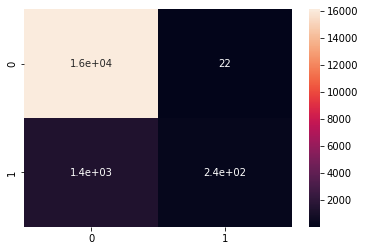

In [ ]:
# Random Forest classifier
with mlflow.start_run():
    RF = RandomForestClassifier(random_state=27,n_estimators=50)
    RF = RF.fit(X_train,y_train)
    y_pred = RF.predict(X_test)
    RF_ac_tr = RF.score(X_train, y_train)
    RF_ac_te = RF.score(X_test, y_test)
    RF_mac   = accuracy_score(y_test,y_pred)
    RF_recall = recall_score(y_test,y_pred, average = 'weighted')
    RF_f1_score = f1_score(y_test,y_pred, average = 'weighted')
    RF_precision_score = precision_score(y_test,y_pred, average = 'weighted')

    print('Accuracy for Training data:',RF_ac_tr)
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    print('Model Accuracy:',RF_mac )
    print(classification_report(y_test,y_pred))

    mlflow.log_metric("Training accuracy", RF_ac_tr)
    mlflow.log_metric("Model accuracy", RF_mac)
    mlflow.log_metric("f1_score", RF_f1_score)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(RF, "model", registered_model_name="Random Forest classifier")
    else:
        mlflow.sklearn.log_model(RF, "model")

Accuracy for Training data: 0.9230824908919826
[[16112    16]
 [ 1394   242]]
Model Accuracy: 0.9206259851384824
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16128
           1       0.94      0.15      0.26      1636

    accuracy                           0.92     17764
   macro avg       0.93      0.57      0.61     17764
weighted avg       0.92      0.92      0.89     17764



Successfully registered model 'ADA Boost classifier'.
2022/08/10 16:53:41 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: ADA Boost classifier, version 1
Created version '1' of model 'ADA Boost classifier'.


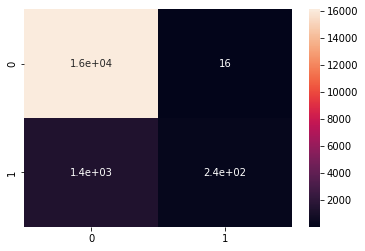

In [ ]:
# ADA Boost classifier
with mlflow.start_run():
    AB = AdaBoostClassifier(random_state=27)
    AB = AB.fit(X_train,y_train)
    y_pred = AB.predict(X_test)
    AB_ac_tr = AB.score(X_train, y_train)
    AB_ac_te = AB.score(X_test, y_test)
    AB_mac   = accuracy_score(y_test,y_pred)
    AB_recall = recall_score(y_test,y_pred, average = 'weighted')
    AB_f1_score = f1_score(y_test,y_pred, average = 'weighted')
    AB_precision_score = precision_score(y_test,y_pred, average = 'weighted')

    print('Accuracy for Training data:',AB_ac_tr)
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    print('Model Accuracy:',AB_mac )
    print(classification_report(y_test,y_pred))

    mlflow.log_metric("Training accuracy", AB_ac_tr)
    mlflow.log_metric("Model accuracy", AB_mac)
    mlflow.log_metric("f1_score", AB_f1_score)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(AB, "model", registered_model_name="ADA Boost classifier")
    else:
        mlflow.sklearn.log_model(AB, "model")

Accuracy for Training data: 0.9239993244384395
[[16128     0]
 [ 1391   245]]
Model Accuracy: 0.9216955640621481
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16128
           1       1.00      0.15      0.26      1636

    accuracy                           0.92     17764
   macro avg       0.96      0.57      0.61     17764
weighted avg       0.93      0.92      0.89     17764



Successfully registered model 'Gradient Boost classifier'.
2022/08/10 17:00:10 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Gradient Boost classifier, version 1
Created version '1' of model 'Gradient Boost classifier'.


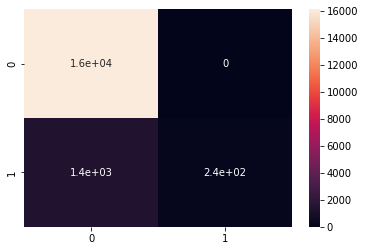

In [ ]:
# Gradient Boost classifier
with mlflow.start_run():
    GB = GradientBoostingClassifier(random_state=27)
    GB =  GB.fit(X_train,y_train)
    y_pred =  GB.predict(X_test)
    GB_ac_tr = GB.score(X_train, y_train)
    GB_ac_te = GB.score(X_test, y_test)
    GB_mac   = accuracy_score(y_test,y_pred)
    GB_recall = recall_score(y_test,y_pred, average = 'weighted')
    GB_f1_score = f1_score(y_test,y_pred, average = 'weighted')
    GB_precision_score = precision_score(y_test,y_pred, average = 'weighted')

    print('Accuracy for Training data:',GB_ac_tr)
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    print('Model Accuracy:',GB_mac )
    print(classification_report(y_test,y_pred))

    mlflow.log_metric("Training accuracy", GB_ac_tr)
    mlflow.log_metric("Model accuracy", GB_mac)
    mlflow.log_metric("f1_score", GB_f1_score)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(GB, "model", registered_model_name="Gradient Boost classifier")
    else:
        mlflow.sklearn.log_model(GB, "model")

c:\Users\sandeep.u\.conda\envs\sharathenv\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy for Training data: 0.9272082418510387
[[16115    13]
 [ 1389   247]]
Model Accuracy: 0.9210763341589732
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     16128
           1       0.95      0.15      0.26      1636

    accuracy                           0.92     17764
   macro avg       0.94      0.58      0.61     17764
weighted avg       0.92      0.92      0.89     17764



Successfully registered model 'XG Boost classifier'.
2022/08/10 17:05:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: XG Boost classifier, version 1
Created version '1' of model 'XG Boost classifier'.


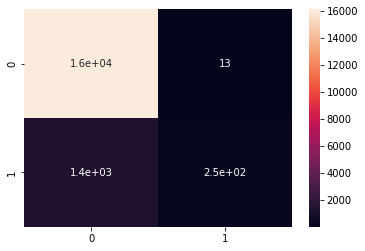

In [ ]:
# XG Boost classifier
from xgboost import XGBClassifier
with mlflow.start_run():
    XG = XGBClassifier(random_state=27)
    XG =  XG.fit(X_train,y_train)
    y_pred =  XG.predict(X_test)
    XG_ac_tr = XG.score(X_train, y_train)
    XG_ac_te = XG.score(X_test, y_test)
    XG_mac   = accuracy_score(y_test,y_pred)
    XG_recall = recall_score(y_test,y_pred, average = 'weighted')
    XG_f1_score = f1_score(y_test,y_pred, average = 'weighted')
    XG_precision_score = precision_score(y_test,y_pred, average = 'weighted')

    print('Accuracy for Training data:',XG_ac_tr)
    print(confusion_matrix(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
    print('Model Accuracy:',XG_mac )
    print(classification_report(y_test,y_pred))

    mlflow.log_metric("Training accuracy", XG_ac_tr)
    mlflow.log_metric("Model accuracy", XG_mac)
    mlflow.log_metric("f1_score", XG_f1_score)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(XG, "model", registered_model_name="XG Boost classifier")
    else:
        mlflow.sklearn.log_model(XG, "model")

Random Forest with Gridsearch HPO

In [ ]:
with mlflow.start_run():
    rfc1=RandomForestClassifier(random_state=27, n_estimators= 200, max_depth=6, criterion='gini',max_features='auto',class_weight='balanced_subsample')
    rfc1.fit(X_train,y_train)
    y_pred = rfc1.predict(X_test)
    rfc1_ac_tr = rfc1.score(X_train, y_train)
    rfc1_ac_te = rfc1.score(X_test, y_test)
    rfc1_mac   = accuracy_score(y_test,y_pred)
    rfc1_recall = recall_score(y_test,y_pred, average = 'weighted')
    rfc1_f1_score = f1_score(y_test,y_pred, average = 'weighted')
    rfc1_precision_score = precision_score(y_test,y_pred, average = 'weighted')

    print(classification_report(y_test,y_pred))

    mlflow.log_metric("Training accuracy", rfc1_ac_tr)
    mlflow.log_metric("Model accuracy", rfc1_mac)
    mlflow.log_metric("f1_score", rfc1_f1_score)

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(rfc1, "model", registered_model_name="Random Forest classifier")
    else:
        mlflow.sklearn.log_model(rfc1, "model")

              precision    recall  f1-score   support

           0       0.95      0.71      0.81     16128
           1       0.18      0.64      0.28      1636

    accuracy                           0.70     17764
   macro avg       0.57      0.67      0.55     17764
weighted avg       0.88      0.70      0.76     17764



Registered model 'Random Forest classifier' already exists. Creating a new version of this model...
2022/08/10 17:11:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Random Forest classifier, version 2
Created version '2' of model 'Random Forest classifier'.


In [ ]:
from joblib import dump
MODEL_NAME = "rf.pkl"
dump(rfc1, MODEL_NAME)
print("pickle file is created")

pickle file is created
